In [1]:
import pandas as pd

from helpers import swatch
from metrics import *

In [2]:
def display_colored(df):
    display(df.style.applymap(lambda c:"background-color: {}".format(c), subset=['rgb']))

# Color differences

In [3]:
dmc = pd.read_csv('dmc.csv', index_col='number')
ariadna = pd.read_csv('ariadna.csv', index_col='number')

In [4]:
base_numbers = ['321', '518', '553', '701', '3863']

In [5]:
display_colored(dmc.loc[base_numbers])

,name,rgb
number,,
321,Red,#c72b3b
518,Light Wedgwood,#4f93a7
553,Violet,#a3638b
701,Light Green,#3f8f29
3863,Medium Mocha Beige,#a4835c


In [6]:
def find_similar(base_number, metric, n=5):
    base_color = dmc.loc[base_number]['rgb']
    
    ariadna['distance'] = [metric(base_color, color) for color in ariadna['rgb']]
    similar_rows = ariadna.nsmallest(n, 'distance')
    
    display_colored(similar_rows)
    swatch(base_color,
           similar_rows['rgb'].to_list(),
           base_label=base_number,
           compared_labels=similar_rows.index.to_list())

## RGB space

### RGB euclidean

$\text{score}=\text{distance} ^{2}={(R_{2}-R_{1})^{2}+(G_{2}-G_{1})^{2}+(B_{2}-B_{1})^{2}}$

,pl,name,rgb,distance
number,,,,
1553,jasna czerwień,light red,#cc2f2f,185
1757,czerwonokasztanowy,red chestnut,#b43c3c,651
1555,czerwień ciemna,christmas red dark,#c92b55,680
1547,czerwień świąteczna jasna,christmas red light,#e22b3c,730
1750,terakota ciemna,terracotta dark,#b0403a,971


,pl,name,rgb,distance
number,,,,
1617,niebieski bardzo ciemny,blue very dark,#408bb6,514
1616,niebieski ciemny,blue dark,#50a0c8,1259
1642,morski,sea green,#329b91,1389
1643,ciemny morski,sea blue dark,#358c8c,1454
1637,niebieski antyczny,antique blue,#53788c,1474


,pl,name,rgb,distance
number,,,,
1585,śliwkowy,plum,#915d8c,361
1762A,kakaowy średni,cocoa medium,#996d7b,456
1577,perłoworóżowy średni,shell pink medium,#b37586,605
1595,ciemny wrzos,heather dark,#b85893,626
1592,fioletowy jasny,violet light,#af71ab,1364


,pl,name,rgb,distance
number,,,,
1701,zieleń papuzia najciemniejsza,parrot green ultra dark,#318229,365
1700,zieleń papuzia bardzo ciemna,parrot green very dark,#41b430,1422
1693,zieleń awokado,avocado green,#648228,1539
1694,zieleń awokado ciemna,avocado green dark,#466432,1979
1672,tymniankowy najciemniejszy,turquoise ultra very dark,#3c643c,2219


,pl,name,rgb,distance
number,,,,
1792,szaroczekoladowy jasny,gray chocolate,#a0965a,381
1797,szarobeżowy ciemny,beige grey dark,#a09664,441
1793,szaroczekoladowy,gray chocolate,#96824b,486
1798,szarobeżowy bardzo ciemny,beige grey very dark,#a0995a,504
1770,piasek pustyni jasny,desert sand light,#be8264,741


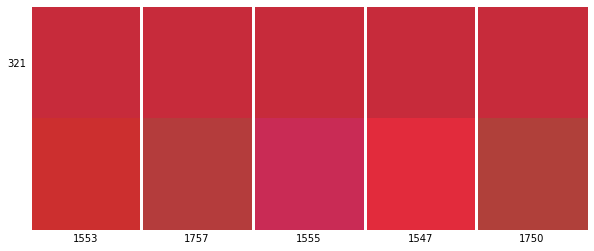

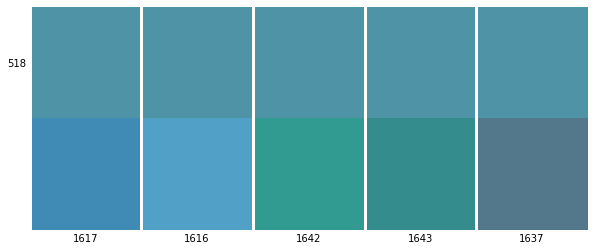

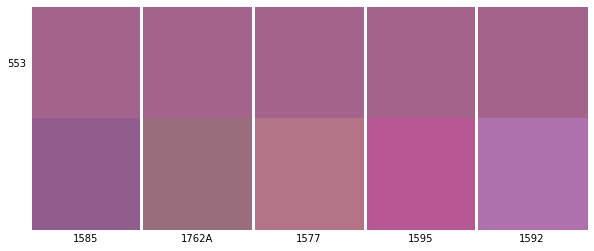

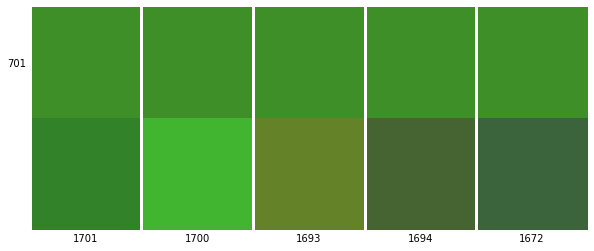

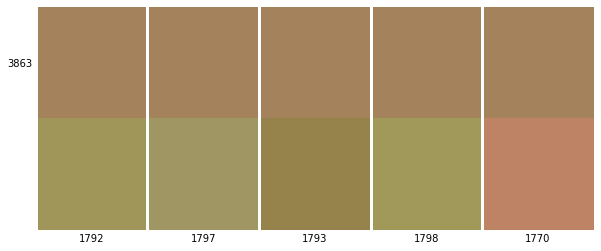

In [7]:
for base_num in base_numbers:
    find_similar(base_num, rgb_euclidean, 5)

### RGB with gamma correction

${\begin{cases}{\sqrt {2\times \Delta R^{2}+4\times \Delta G^{2}+3\times \Delta B^{2}}}&{\bar {R}}<128,\\{\sqrt {3\times \Delta R^{2}+4\times \Delta G^{2}+2\times \Delta B^{2}}}&\text{otherwise}\end{cases}}$

${\begin{aligned}\Delta R&=R_{1}-R_{2}\\\Delta G&=G_{1}-G_{2}\\\Delta B&=B_{1}-B_{2}\\{\bar {R}}&={{R_{1}+R_{2}} \over 2}\\\end{aligned}}$

,pl,name,rgb,distance
number,,,,
1553,jasna czerwień,light red,#cc2f2f,427
1555,czerwień ciemna,christmas red dark,#c92b55,1364
1547,czerwień świąteczna jasna,christmas red light,#e22b3c,2189
1757,czerwonokasztanowy,red chestnut,#b43c3c,2241
1750,terakota ciemna,terracotta dark,#b0403a,3353


,pl,name,rgb,distance
number,,,,
1617,niebieski bardzo ciemny,blue very dark,#408bb6,1381
1642,morski,sea green,#329b91,3390
1643,ciemny morski,sea blue dark,#358c8c,3735
1616,niebieski ciemny,blue dark,#50a0c8,3945
1633,niebieski antyczny ciemny,antique blue dark,#6e878c,4685


,pl,name,rgb,distance
number,,,,
1585,śliwkowy,plum,#915d8c,1118
1762A,kakaowy średni,cocoa medium,#996d7b,1212
1595,ciemny wrzos,heather dark,#b85893,1935
1577,perłoworóżowy średni,shell pink medium,#b37586,2114
1592,fioletowy jasny,violet light,#af71ab,3264


,pl,name,rgb,distance
number,,,,
1701,zieleń papuzia najciemniejsza,parrot green ultra dark,#318229,1068
1693,zieleń awokado,avocado green,#648228,3417
1700,zieleń papuzia bardzo ciemna,parrot green very dark,#41b430,5631
1687,zielony ciemny,green dark,#1b820a,6151
1713,oliwkowozielony ciemny,olive green dark,#6e7828,6537


,pl,name,rgb,distance
number,,,,
1793,szaroczekoladowy,gray chocolate,#96824b,1170
1792,szaroczekoladowy jasny,gray chocolate,#a0965a,1500
1797,szarobeżowy ciemny,beige grey dark,#a09664,1620
1798,szarobeżowy bardzo ciemny,beige grey very dark,#a0995a,1992
1770,piasek pustyni jasny,desert sand light,#be8264,2160


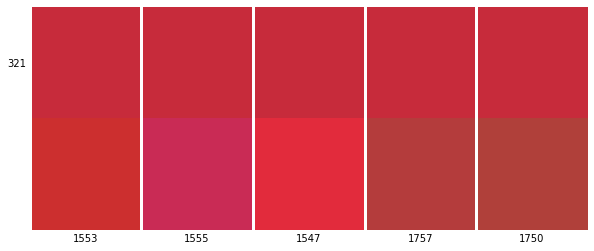

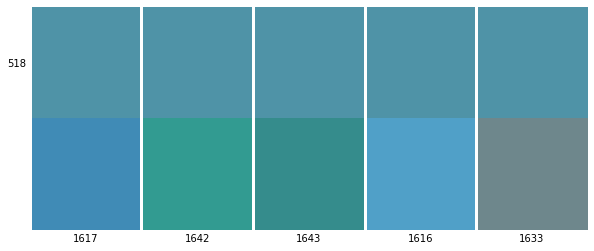

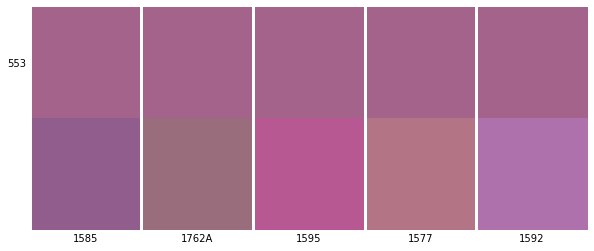

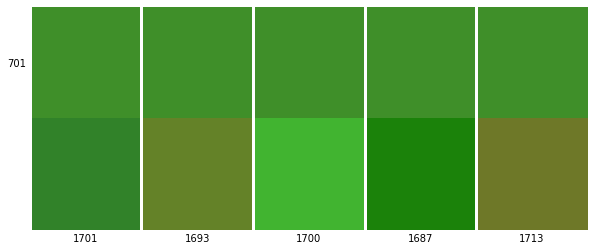

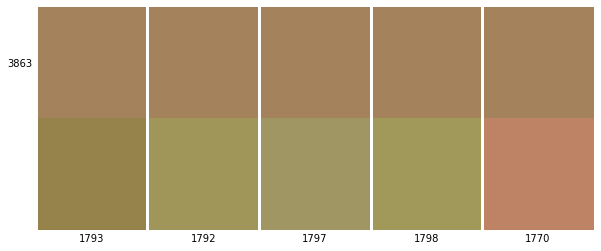

In [8]:
for base_num in base_numbers:
    find_similar(base_num, rgb_gamma_correction, 5)

## XYZ

$\text{score}=\text{distance} ^{2}={(X_{2}-X_{1})^{2}+(Y_{2}-Y_{1})^{2}+(Z_{2}-Z_{1})^{2}}$

,pl,name,rgb,distance
number,,,,
1553,jasna czerwień,light red,#cc2f2f,0.000409
1561,żurawinowy ciemny,cranberry dark,#c7002e,0.000817
1555C,łososiowy róż bardzo ciemny,salmon pink very dark,#bf4949,0.001127
1757,czerwonokasztanowy,red chestnut,#b43c3c,0.001651
1529,morelowy bardzo ciemny,apricot very dark,#c83c00,0.001697


,pl,name,rgb,distance
number,,,,
1608A,jagodowy ciemny,blueberry dark,#7d74a8,0.003356
1617,niebieski bardzo ciemny,blue very dark,#408bb6,0.005941
1642,morski,sea green,#329b91,0.009671
1592,fioletowy jasny,violet light,#af71ab,0.010956
1635,stalowoszary jasny,steel grey light,#8c9696,0.011396


,pl,name,rgb,distance
number,,,,
1585,śliwkowy,plum,#915d8c,0.002324
1595,ciemny wrzos,heather dark,#b85893,0.002849
1762A,kakaowy średni,cocoa medium,#996d7b,0.003443
1633,niebieski antyczny ciemny,antique blue dark,#6e878c,0.003695
1577,perłoworóżowy średni,shell pink medium,#b37586,0.005620


,pl,name,rgb,distance
number,,,,
1693,zieleń awokado,avocado green,#648228,0.000626
1682,zieleń ciemna,green dark,#008c46,0.001801
1713,oliwkowozielony ciemny,olive green dark,#6e7828,0.001812
1701,zieleń papuzia najciemniejsza,parrot green ultra dark,#318229,0.002398
1706,zieleń khaki ciemna,khaki green dark,#828233,0.003098


,pl,name,rgb,distance
number,,,,
1803,oliwkowoszary,olive gray,#8c9650,0.001755
1793,szaroczekoladowy,gray chocolate,#96824b,0.002958
1792,szaroczekoladowy jasny,gray chocolate,#a0965a,0.003005
1788,brudnobrązowy średni,drab brown medium,#a08c3c,0.003339
1797,szarobeżowy ciemny,beige grey dark,#a09664,0.004171


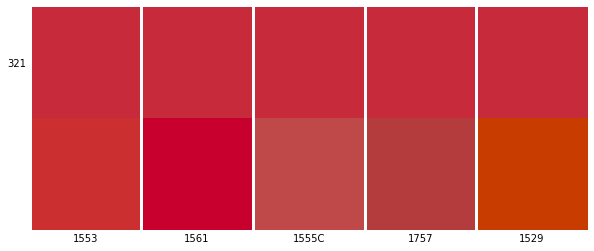

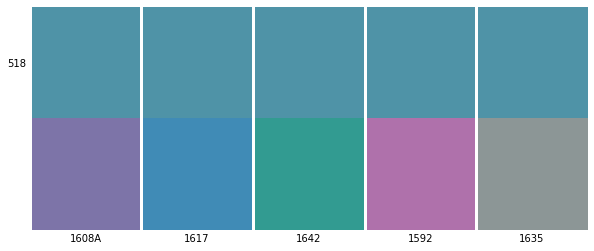

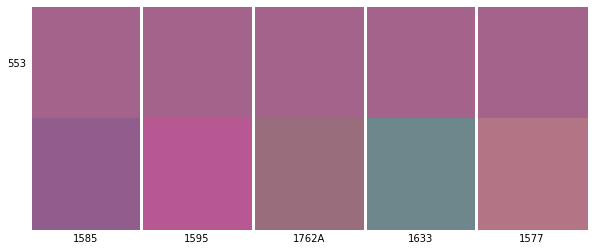

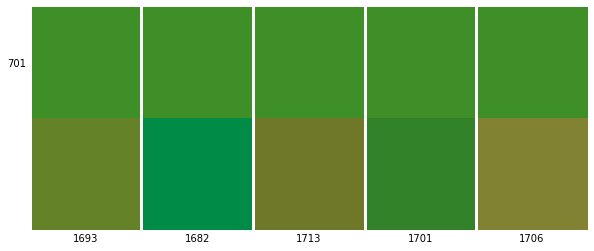

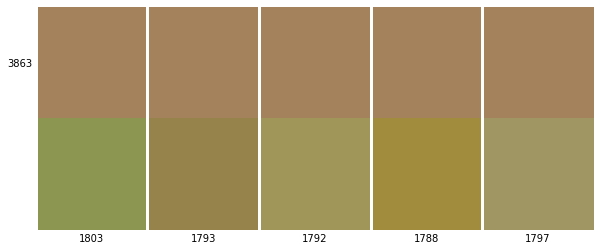

In [9]:
for base_num in base_numbers:
    find_similar(base_num, xyz_euclidean, 5)

## CIELAB